<B>Complete the following exercises. Each question is a single codeblock with the question at the top as a comment.</b>

You may find the following resources helpful:
    
<a href="http://pandas.pydata.org/pandas-docs/stable/10min.html">10 Minutes to Pandas</a><BR>
<a href="https://www.youtube.com/watch?v=w26x-z-BdWQ">Pandas Video Tutorial by Wes McKinney(!)</a><BR>
<a href="https://github.com/guipsamora/pandas_exercises">Pandas Exercises</a><BR>
<a href="https://github.com/lemonbalm/pandas-exercises">More Pandas Exercises</a><BR>

* (1) Import numpy as np, matplotlib.pyplot as plt, and pandas as pd. Set matplotlib to inline display.
* (2) Read the Fisher Iris Data in as a variable called df.
* (3) Display the first five lines of df using head.
* (4-7) - Plot a histogram of each of the four variables (leaf/sepal length/width).  Adjust the number of bins to produce a resolution you find instructive/visually satisfying.  Use xlabel and ylabel to label the axes.
* (8) - Save this figure use savefig.
* (9) Using groupby, group the data by species
* (10) Using the groups, create a bar graph of the mean sepal length by species.  Label the axes.
* (11) Use subplots to make a 2x2 pane figure, with each pane a scatterplot of your choosing.  Make sure axes are labeled!
* (12) Use tail to print out the last 10 rows of df.
* (13) Use a combination of np.sum() and a selector (e.g., (df['x'] > 3), count how many rows have a petal length greater than 40.
* (14) How many have a sepal width below the median sepal width?
* (15) Use groups and np.mean to report the mean values for each variable.
* (16) Calculate a new variable based on existing variables, and create a histogram of its distribution.
* (17) Export the data with the new calculated variable as an Excel file.  Open it in Excel, and comment on its appearance.  Look at the documentation of to_excel and figure out how to make it so the index values (line numbers) don't get exported.
* (18-25) Download the prepared election data (https://github.com/thomaspingel/geodata/blob/master/election/state_election_data_1976-2016.csv), load it as a new dataframe, and use some of the commands above to explore the dataset.

In [76]:
#Number 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [104]:
#Numbers 2 and 3

df = pd.read_csv('fisher_iris_data.csv')
df.head(n=5)

,species,petal_width,petal_length,sepal_width,sepal_length
0,setosa,2,14,33,50
1,setosa,2,10,36,46
2,setosa,2,16,31,48
3,setosa,1,14,36,49
4,setosa,2,13,32,44


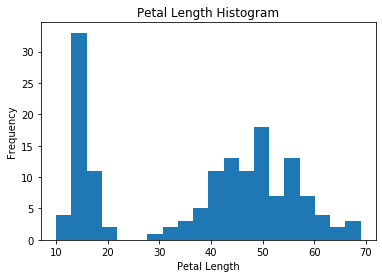

In [105]:
#Numbers 4 and 8

a = plt.hist(df.petal_length,bins=20)
_ = plt.xlabel('Petal Length')
__ = plt.ylabel('Frequency')
___ = plt.title('Petal Length Histogram')
plt.savefig('petal_length_hist',dpi=300)

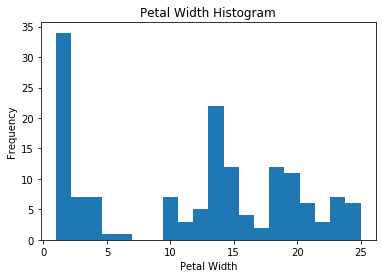

In [106]:
#Number 5

b = plt.hist(df.petal_width,bins=20)
_ = plt.xlabel('Petal Width')
__ = plt.ylabel('Frequency')
___ = plt.title('Petal Width Histogram')

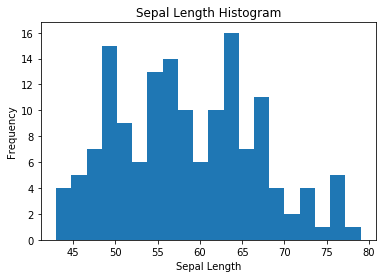

In [107]:
#Number 6

c = plt.hist(df.sepal_length,bins=20)
_ = plt.xlabel('Sepal Length')
__ = plt.ylabel('Frequency')
___ = plt.title('Sepal Length Histogram')

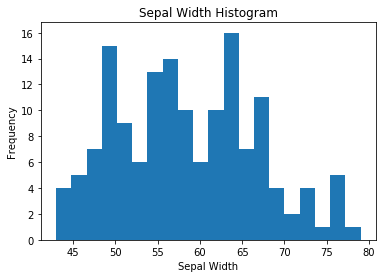

In [108]:
#Number 7

d = plt.hist(df.sepal_length,bins=20)
_ = plt.xlabel('Sepal Width')
__ = plt.ylabel('Frequency')
___ = plt.title('Sepal Width Histogram')

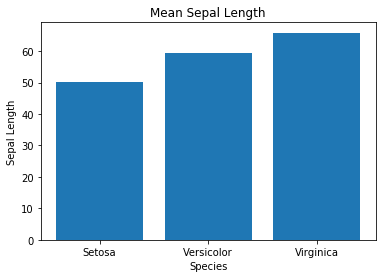

In [109]:
#Numbers 9 and 10

groups = df.groupby(by='species')
groups.mean()
length = [50.10,59.36,65.88]
bars = ('Setosa','Versicolor','Virginica')
y_pos = np.arange(len(bars))
_ = plt.bar(y_pos,length)
_ = plt.xticks(y_pos,bars)
_ = plt.xlabel('Species')
_ = plt.ylabel('Sepal Length')
_ = plt.title('Mean Sepal Length')

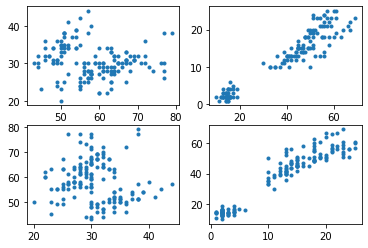

In [110]:
#Number 11
plt.subplot(2,2,1)
_ = plt.plot(df.sepal_length,df.sepal_width,'.')
plt.subplot(2,2,2)
_ = plt.plot(df.petal_length,df.petal_width,'.')
plt.subplot(2,2,3)
_ = plt.plot(df.sepal_width,df.sepal_length,'.')
plt.subplot(2,2,4)
_ = plt.plot(df.petal_width,df.petal_length,'.')

In [57]:
#Number 12
df.tail(12)

,species,petal_width,petal_length,sepal_width,sepal_length
138,virginica,18,48,28,62
139,virginica,24,56,34,63
140,virginica,16,58,30,72
141,virginica,21,59,30,71
142,virginica,18,56,29,63
143,virginica,23,69,26,77
144,virginica,19,61,28,74
145,virginica,18,63,29,73
146,virginica,22,58,30,65
147,virginica,19,53,27,64


In [58]:
#Number 13
petals = df.petal_length>40
np.sum(petals)

85

In [59]:
#Number 14
median = np.median(df.sepal_width)
np.count_nonzero(df.sepal_width<median)

57

In [62]:
#Number 15
meangroups = df.groupby(by='species')
meangroups.mean()

,petal_width,petal_length,sepal_width,sepal_length
species,,,,
setosa,2.46,14.62,34.28,50.10
versicolor,13.26,43.22,27.64,59.36
virginica,20.06,55.52,29.74,65.88


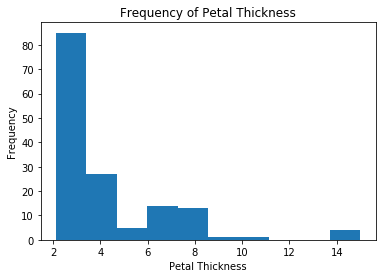

In [89]:
#Number 16
df['petal_thickness'] = df.petal_length / df.petal_width
_ = plt.hist(df['petal_thickness'])
_ = plt.xlabel('Petal Thickness')
_ = plt.ylabel('Frequency')
_ = plt.title('Frequency of Petal Thickness')

In [113]:
#Number 17
df.to_excel('jupyternotebook.xlsx', engine='xlsxwriter', index = False)  
#The data seems raw in appearance but looks normal for excel. It is very similar to how it appears when called with df.head()


In [73]:
#Numbers 18-25
df1 = pd.read_csv('state_election_data_1976-2016.csv')
df1.head()

,state,state_po,state_fips,gop_1976_votes,dem_1976_votes,totalvotes_1976,gop_1976_prc,dem_1976_prc,gop_minus_dem_prc_1976,gop_1980_votes,...,totalvotes_2012,gop_2012_prc,dem_2012_prc,gop_minus_dem_prc_2012,gop_2016_votes,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016
0,Alabama,AL,1,504070,659170,1182850,42.61,55.73,-13.12,654192,...,2074338,60.55,38.36,22.19,1318255,729547,2123372,62.08,34.36,27.72
1,Alaska,AK,2,71555,44058,123574,57.90,35.65,22.25,86112,...,300495,54.80,40.81,13.99,163387,116454,318608,51.28,36.55,14.73
2,Arizona,AZ,4,418642,295602,742719,56.37,39.80,16.57,529688,...,2299254,53.65,44.59,9.06,1252401,1161167,2573165,48.67,45.13,3.54
3,Arkansas,AR,5,267903,498604,767535,34.90,64.96,-30.06,403164,...,1069468,60.57,36.88,23.69,684872,380494,1130635,60.57,33.65,26.92
4,California,CA,6,3882244,3742284,7803770,49.75,47.95,1.80,4522994,...,13038547,37.12,60.24,-23.12,4483810,8753788,14181595,31.62,61.73,-30.11


In [119]:
df1.describe()

,state_fips,gop_1976_votes,dem_1976_votes,totalvotes_1976,gop_1976_prc,dem_1976_prc,gop_minus_dem_prc_1976,gop_1980_votes,dem_1980_votes,totalvotes_1980,...,totalvotes_2012,gop_2012_prc,dem_2012_prc,gop_minus_dem_prc_2012,gop_2016_votes,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016
count,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,...,5.100000e+01,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000
mean,28.960784,7.675641e+05,8.005066e+05,1.730777e+06,47.951961,49.041961,-1.090000,8.607602e+05,6.957049e+05,1.696017e+06,...,2.671702e+06,48.628235,48.366275,0.261961,1.235001e+06,1.291247e+06,3.042604e+06,47.511569,43.258039,4.253529
std,15.832828,8.126017e+05,8.273674e+05,2.239032e+06,8.130942,8.602756,15.196332,8.802488e+05,6.978711e+05,1.725674e+06,...,2.951471e+06,12.406483,11.856167,23.257514,1.142382e+06,1.548086e+06,3.960244e+06,13.498684,12.321450,23.226725
min,1.000000,2.787300e+04,4.405800e+04,1.235740e+05,16.510000,25.420000,-65.120000,2.331300e+04,4.184200e+04,1.584450e+05,...,2.507010e+05,7.280000,24.750000,-83.630000,1.272300e+04,5.597300e+04,2.587880e+05,4.070000,19.470000,-86.410000
25%,16.500000,2.077850e+05,1.916290e+05,4.135870e+05,45.780000,45.735000,-5.930000,2.446505e+05,1.511515e+05,4.468340e+05,...,7.178650e+05,41.020000,39.475000,-14.415000,3.774225e+05,2.975840e+05,7.580940e+05,41.140000,34.540000,-9.600000
50%,29.000000,5.040700e+05,5.324420e+05,1.092251e+06,48.930000,48.460000,0.840000,6.522640e+05,4.568900e+05,1.184450e+06,...,1.797212e+06,47.690000,50.010000,-2.980000,9.491360e+05,7.801540e+05,2.001336e+06,48.670000,45.130000,3.540000
75%,41.500000,8.819985e+05,1.006550e+06,1.951766e+06,51.870000,52.360000,5.655000,1.023620e+06,9.110685e+05,2.075870e+06,...,3.154856e+06,57.835000,54.805000,17.610000,1.575898e+06,1.810340e+06,3.626434e+06,57.440000,49.005000,20.085000
max,56.000000,3.882244e+06,3.742284e+06,1.333652e+07,62.430000,81.630000,28.780000,4.522994e+06,3.082943e+06,8.582938e+06,...,1.423357e+07,72.790000,90.910000,48.040000,4.685047e+06,8.753788e+06,2.340625e+07,68.630000,90.480000,45.770000


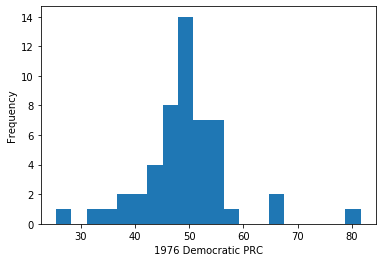

In [126]:
d=plt.hist(df1.dem_1976_prc,bins=20)
_ = plt.xlabel('1976 Democratic PRC')
_ = plt.ylabel('Frequency')

In [127]:
 votes = df1.totalvotes_1980>60000
np.sum(votes)

51

In [128]:
#Export to excel
df1.to_excel('electiondata.xlsx', engine='xlsxwriter', index = False)  